In [1]:
# Tyler Palmer
# Homework 1
# ID: 801058786
# https://github.com/TPal49/IntroML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

data = pd.read_csv("Housing.csv")
data = data.to_numpy()

Saving Housing.csv to Housing.csv


In [3]:
def oneHotEncoder(x):
  #one hot encoding process
  for i in [4,5,6,7,8,10]:
    onehot = pd.get_dummies(x[:,i])
    #print(onehot)
    x = np.hstack([x,onehot])

  count  = 0
  for i in [4,5,6,7,8,10]:
    i = i - count
    x = np.delete(x,i,1)
    count += 1
  return x

def Normalizer(x):
  x_norm = (x - x.min())/(x.max() - x.min())
  return x_norm

def Standardizer(x):
  for j in range(x.shape[1]):
    for i in range(len(x)):
      x[i,j] = (x[i,j] - x[:,j].mean()) / np.std(x[:,j])
  return x

In [95]:
def linRegModel(x,theta):
  x0 = np.ones([len(x),1])
  X = np.hstack((x,x0))
  #print(X)
  yhat = np.dot(X,theta)
  return yhat, X

def lossFunct(y,yhat):
  MSE = ((yhat-y)**2).mean()
  return(MSE)

def lossFunct2(y,yhat,lam,theta):
  MSE = ((yhat-y)**2).mean() + lam*((theta[:-1])**2).sum()
  return MSE

def gradFunct(y,x,yhat,theta,lr = 0.001):
  matrix = x.transpose() @ (yhat - y) * 1/len(y) * 2 * lr
  theta = theta - matrix
  #print(matrix)
  return(theta)


def gradFunct2(y,x,yhat,theta,lam,lr = 0.01):
  matrix = (x.transpose() @ (yhat - y) * 1/len(y) * 2 + lam*theta )* lr
  theta = theta - matrix
  #print(matrix)
  return theta

Problem 1

1.a) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables. 

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 



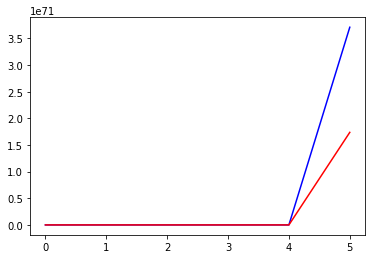

In [77]:
train_loss = []
val_loss = []
y_1a_train = data[0:int((len(data)*0.8)),0]
y_1a_val = data[int((len(data)*0.8))+1:len(data),0]
theta_1a = np.zeros(6)

x_1a_train = data[0:int((len(data)*0.8)),(1,2,3,4,10)]
x_1a_val = data[int((len(data)*0.8))+1:len(data),(1,2,3,4,10)]

x0 = np.ones([len(x_1a_train),1])
X = np.hstack([x0,x_1a_train])

xv0 = np.ones([len(x_1a_val),1])
Xv = np.hstack([xv0,x_1a_val])

for i in range(6):
  theta_1a = gradFunct(y_1a_train,X,X.dot(theta_1a),theta_1a)
  train_loss.append(lossFunct(y_1a_train,X.dot(theta_1a)))
  val_loss.append(lossFunct(y_1a_val,Xv.dot(theta_1a)))


plt.plot(train_loss, color = "blue")
plt.plot(val_loss, color = "red")

1.b) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables. 

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 

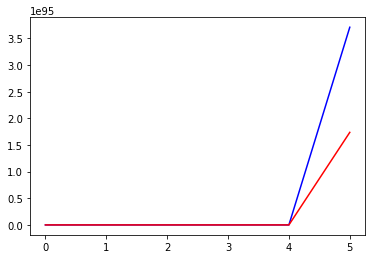

In [49]:
train_loss = []
val_loss = []
y_1b_train = data[0:int((len(data)*0.8)),0]
y_1b_val = data[int((len(data)*0.8))+1:len(data),0]
theta_1b = np.zeros(18)

x_1b_train = data[0:int((len(data)*0.8)),(1,2,3,4,5,6,7,8,9,10,11)]
x_1b_val = data[int((len(data)*0.8))+1:len(data),(1,2,3,4,5,6,7,8,9,10,11)]

x_1b_train = oneHotEncoder(x_1b_train)
x_1b_val = oneHotEncoder(x_1b_val)

x0 = np.ones([len(x_1b_train),1])
X = np.hstack([x0,x_1b_train])

xv0 = np.ones([len(x_1b_val),1])
Xv = np.hstack([xv0,x_1b_val])

for i in range(6):
  theta_1b = gradFunct(y_1b_train,X,X.dot(theta_1b),theta_1b)
  train_loss.append(lossFunct(y_1b_train,X.dot(theta_1b)))
  val_loss.append(lossFunct(y_1b_val,Xv.dot(theta_1b)))

plt.plot(train_loss, color = "blue")
plt.plot(val_loss, color = "red")

Problem 2

2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

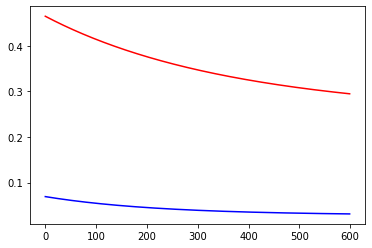

In [81]:
train_loss = []
val_loss = []
y_2a_train = data[0:int((len(data)*0.8)),0]
y_2a_val = data[int((len(data)*0.8))+1:len(data),0]
theta_2a = np.zeros(6)

x_2a_train = data[0:int((len(data)*0.8)),(1,2,3,4,10)]
x_2a_val = data[int((len(data)*0.8))+1:len(data),(1,2,3,4,10)]

x_2a_tnorm = Normalizer(x_2a_train)
x_2a_vnorm = Normalizer(x_2a_val)

y_2a_tnorm = Normalizer(y_2a_train)
y_2a_vnorm = Normalizer(y_2a_val)

x0 = np.ones([len(x_2a_tnorm),1])
X = np.hstack([x0,x_2a_tnorm])

xv0 = np.ones([len(x_2a_vnorm),1])
Xv = np.hstack([xv0,x_2a_vnorm])

for i in range(600):
  theta_2a = gradFunct(y_2a_tnorm,X,X.dot(theta_2a),theta_2a)
  train_loss.append(lossFunct(y_2a_tnorm,X.dot(theta_2a)))
  val_loss.append(lossFunct(y_2a_vnorm,Xv.dot(theta_2a)))

plt.plot(train_loss, color = "blue")
plt.plot(val_loss, color = "red")

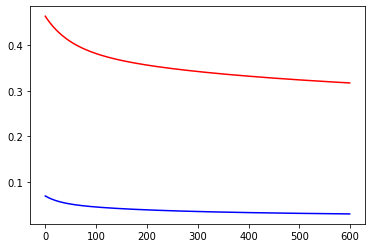

In [82]:
train_loss = []
val_loss = []
y_2a_train = data[0:int((len(data)*0.8)),0]
y_2a_val = data[int((len(data)*0.8))+1:len(data),0]


theta_2a = np.zeros(6)

x_2a_train = data[0:int((len(data)*0.8)),(1,2,3,4,10)]
x_2a_val = data[int((len(data)*0.8))+1:len(data),(1,2,3,4,10)]

x_2a_tstand = Standardizer(x_2a_train)
x_2a_vstand = Standardizer(x_2a_val)

y_2a_tnorm = Normalizer(y_2a_train)
y_2a_vnorm = Normalizer(y_2a_val)


x0 = np.ones([len(x_2a_tstand),1])
X = np.hstack([x0,x_2a_tstand])

xv0 = np.ones([len(x_2a_vstand),1])
Xv = np.hstack([xv0,x_2a_vstand])

for i in range(600):
  theta_2a = gradFunct(y_2a_tnorm,X,X.dot(theta_2a),theta_2a)
  train_loss.append(lossFunct(y_2a_tnorm,X.dot(theta_2a)))
  val_loss.append(lossFunct(y_2a_vnorm,Xv.dot(theta_2a)))

#print(train_loss)
#print(val_loss)
plt.plot(train_loss, color = "blue")
plt.plot(val_loss, color = "red")

After training the data using both standardization and normalization on the smaller sets, it appears that standardization works better. This is because it closes in on the convergent loss faster than the normalized input training. 

2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

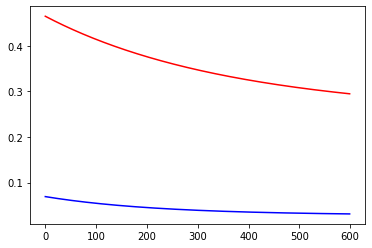

In [83]:
train_loss = []
val_loss = []
y_2b_train = data[0:int((len(data)*0.8)),0]
y_2b_val = data[int((len(data)*0.8))+1:len(data),0]
theta_2b = np.zeros(18)

x_2b_train = data[0:int((len(data)*0.8)),(1,2,3,4,5,6,7,8,9,10,11)]
x_2b_val = data[int((len(data)*0.8))+1:len(data),(1,2,3,4,5,6,7,8,9,10,11)]

x_2b_train = oneHotEncoder(x_2b_train)
x_2b_val = oneHotEncoder(x_2b_val)

x_2b_tnorm = Normalizer(x_2b_train)
x_2b_vnorm = Normalizer(x_2b_val)

y_2b_tnorm = Normalizer(y_2b_train)
y_2b_vnorm = Normalizer(y_2b_val)

x0 = np.ones([len(x_2b_tnorm),1])
X = np.hstack([x0,x_2b_tnorm])

xv0 = np.ones([len(x_2b_vnorm),1])
Xv = np.hstack([xv0,x_2b_vnorm])

for i in range(600):
  theta_2b = gradFunct(y_2b_tnorm,X,X.dot(theta_2b),theta_2b)
  train_loss.append(lossFunct(y_2b_tnorm,X.dot(theta_2b)))
  val_loss.append(lossFunct(y_2b_vnorm,Xv.dot(theta_2b)))

plt.plot(train_loss, color = "blue")
plt.plot(val_loss, color = "red")

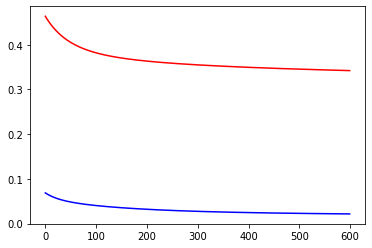

In [84]:
train_loss = []
val_loss = []
y_2b_train = data[0:int((len(data)*0.8)),0]
y_2b_val = data[int((len(data)*0.8))+1:len(data),0]
theta_2b = np.zeros(18)

x_2b_train = data[0:int((len(data)*0.8)),(1,2,3,4,5,6,7,8,9,10,11)]
x_2b_val = data[int((len(data)*0.8))+1:len(data),(1,2,3,4,5,6,7,8,9,10,11)]

x_2b_train = oneHotEncoder(x_2b_train)
x_2b_val = oneHotEncoder(x_2b_val)

x_2b_tstand = Standardizer(x_2b_train)
x_2b_vstand = Standardizer(x_2b_val)

y_2b_tnorm = Normalizer(y_2b_train)
y_2b_vnorm = Normalizer(y_2b_val)

x0 = np.ones([len(x_2b_tstand),1])
X = np.hstack([x0,x_2b_tstand])

xv0 = np.ones([len(x_2b_vstand),1])
Xv = np.hstack([xv0,x_2b_vstand])

for i in range(600):
  theta_2b = gradFunct(y_2b_tnorm,X,X.dot(theta_2b),theta_2b)
  train_loss.append(lossFunct(y_2b_tnorm,X.dot(theta_2b)))
  val_loss.append(lossFunct(y_2b_vnorm,Xv.dot(theta_2b)))

plt.plot(train_loss, color = "blue")
plt.plot(val_loss, color = "red")

After having plotted the different input scalings it has been determined that for the purposes of this assignment, standardization seems to have worked best. While both had begun to converge, standardization seemed to close in faster than normalization. 

Problem 3

3.a) Repeat problem 2 a, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a. 

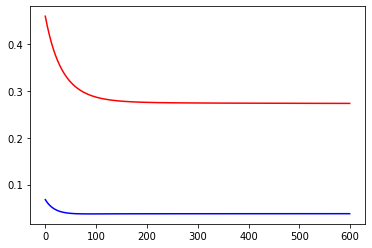

In [99]:
train_loss = []
val_loss = []
y_3a_train = data[0:int((len(data)*0.8)),0]
y_3a_val = data[int((len(data)*0.8))+1:len(data),0]
theta_3a = np.zeros(6)

x_3a_train = data[0:int((len(data)*0.8)),(1,2,3,4,10)]
x_3a_val = data[int((len(data)*0.8))+1:len(data),(1,2,3,4,10)]

x_3a_tnorm = Normalizer(x_3a_train)
x_3a_vnorm = Normalizer(x_3a_val)

y_3a_tnorm = Normalizer(y_3a_train)
y_3a_vnorm = Normalizer(y_3a_val)

x0 = np.ones([len(x_3a_tnorm),1])
X = np.hstack([x0,x_3a_tnorm])

xv0 = np.ones([len(x_3a_vnorm),1])
Xv = np.hstack([xv0,x_3a_vnorm])

for i in range(600):
  theta_3a = gradFunct2(y_3a_tnorm,X,X.dot(theta_3a),theta_3a,lam = 0.3)
  train_loss.append(lossFunct2(y_3a_tnorm,X.dot(theta_3a),lam = 0.3, theta = theta_3a))
  val_loss.append(lossFunct2(y_3a_vnorm,Xv.dot(theta_3a),lam = 0.3, theta = theta_3a))

plt.plot(train_loss, color = "blue")
plt.plot(val_loss, color = "red")

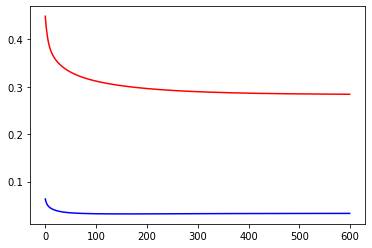

In [96]:
train_loss = []
val_loss = []
y_3a_train = data[0:int((len(data)*0.8)),0]
y_3a_val = data[int((len(data)*0.8))+1:len(data),0]
theta_3a = np.zeros(6)

x_3a_train = data[0:int((len(data)*0.8)),(1,2,3,4,10)]
x_3a_val = data[int((len(data)*0.8))+1:len(data),(1,2,3,4,10)]

x_3a_tstand = Standardizer(x_3a_train)
x_3a_vstand = Standardizer(x_3a_val)

y_3a_tnorm = Normalizer(y_3a_train)
y_3a_vnorm = Normalizer(y_3a_val)

x0 = np.ones([len(x_3a_tstand),1])
X = np.hstack([x0,x_3a_tstand])

xv0 = np.ones([len(x_3a_vstand),1])
Xv = np.hstack([xv0,x_3a_vstand])

for i in range(600):
  theta_3a = gradFunct2(y_3a_tnorm,X,X.dot(theta_3a),theta_3a,lam = 0.3)
  train_loss.append(lossFunct2(y_3a_tnorm,X.dot(theta_3a),lam = 0.3, theta = theta_3a))
  val_loss.append(lossFunct2(y_3a_vnorm,Xv.dot(theta_3a),lam = 0.3, theta = theta_3a))

#print(val_loss)
plt.plot(train_loss, color = "blue")
plt.plot(val_loss, color = "red")

Unlike in question 2, we can see that normalization works better when we apply a weight penalty. This can be seen by the normalized training curve approaching its convergent loss faster than the standardized one. 

3.b) Repeat problem 2 b, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b. 

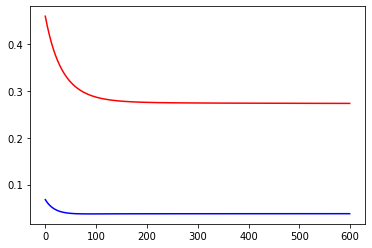

In [97]:
train_loss = []
val_loss = []
y_3b_train = data[0:int((len(data)*0.8)),0]
y_3b_val = data[int((len(data)*0.8))+1:len(data),0]
theta_3b = np.zeros(18)

x_3b_train = data[0:int((len(data)*0.8)),(1,2,3,4,5,6,7,8,9,10,11)]
x_3b_val = data[int((len(data)*0.8))+1:len(data),(1,2,3,4,5,6,7,8,9,10,11)]

x_3b_train = oneHotEncoder(x_3b_train)
x_3b_val = oneHotEncoder(x_3b_val)

x_3b_tnorm = Normalizer(x_3b_train)
x_3b_vnorm = Normalizer(x_3b_val)

y_3b_tnorm = Normalizer(y_3b_train)
y_3b_vnorm = Normalizer(y_3b_val)

x0 = np.ones([len(x_3b_tnorm),1])
X = np.hstack([x0,x_3b_tnorm])

xv0 = np.ones([len(x_3b_vnorm),1])
Xv = np.hstack([xv0,x_3b_vnorm])

for i in range(600):
  theta_3b = gradFunct2(y_3b_tnorm,X,X.dot(theta_3b),theta_3b,lam = 0.3)
  train_loss.append(lossFunct2(y_3b_tnorm,X.dot(theta_3b),lam = 0.3, theta = theta_3b))
  val_loss.append(lossFunct2(y_3b_vnorm,Xv.dot(theta_3b),lam = 0.3, theta = theta_3b))


plt.plot(train_loss, color = "blue")
plt.plot(val_loss, color = "red")

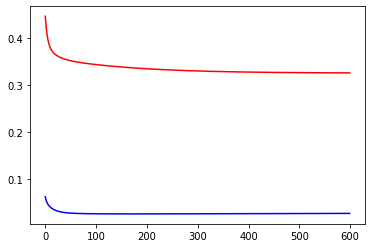

In [98]:
train_loss = []
val_loss = []
y_3b_train = data[0:int((len(data)*0.8)),0]
y_3b_val = data[int((len(data)*0.8))+1:len(data),0]
theta_3b = np.zeros(18)

x_3b_train = data[0:int((len(data)*0.8)),(1,2,3,4,5,6,7,8,9,10,11)]
x_3b_val = data[int((len(data)*0.8))+1:len(data),(1,2,3,4,5,6,7,8,9,10,11)]

x_3b_train = oneHotEncoder(x_3b_train)
x_3b_val = oneHotEncoder(x_3b_val)

x_3b_tstand = Standardizer(x_3b_train)
x_3b_vstand = Standardizer(x_3b_val)

y_3b_tnorm = Normalizer(y_3b_train)
y_3b_vnorm = Normalizer(y_3b_val)

x0 = np.ones([len(x_3b_tstand),1])
X = np.hstack([x0,x_3b_tstand])

xv0 = np.ones([len(x_3b_vstand),1])
Xv = np.hstack([xv0,x_3b_vstand])

for i in range(600):
  theta_3b = gradFunct2(y_3b_tnorm,X,X.dot(theta_3b),theta_3b,lam = 0.3)
  train_loss.append(lossFunct2(y_3b_tnorm,X.dot(theta_3b),lam = 0.3, theta = theta_3b))
  val_loss.append(lossFunct2(y_3b_vnorm,Xv.dot(theta_3b),lam = 0.3, theta = theta_3b))


plt.plot(train_loss, color = "blue")
plt.plot(val_loss, color = "red")

As with the first part, normalization performs better than the standardization. This can be seen by observing that normalization converges faster than standardization. 